# Gemaakt op 12/05/2025 door martijn

In [150]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [151]:
from sklearn import tree
import graphviz
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")

    return (predictions == actuals).sum() / len(actuals)

def plot_tree_classification(model, features, class_names):
    dot_data = tree.export_graphviz(model, out_file=None,
                          feature_names=features,
                          class_names=class_names,
                          filled=True, rounded=True,
                          special_characters=True)

    graph = graphviz.Source(dot_data)

    graph.render("decision_tree")

    return graph

ik heb hierboven even de standaard functies geplakt.

In [152]:
games = pd.read_csv("./games.csv")
games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


## Portfolio assignment 16
30 min: Train a decision tree to predict one of the categorical columns of your **own** dataset.
- Prepare the data:<br>
    - <b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to:
         - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
         - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html <br>
- Split your dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeClassifier. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree.
- Use your decision tree model to make predictions for both the train and test set.<br>
<br>

![](https://i.imgur.com/0v1CGNV.png)<br>
- Calculate the accuracy for both the train set predictions and test set predictions.
- Is the accurracy different? Did you expect this difference?
- Use the plot_tree function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?
- Which depth and features did you add per cycle?<br>
<br>

Findings: ...

ik ga hier predicten of dat het ene linux game is of niet. want ik denk niet dat het gaat lukken in een normale marge (hierbij vind ik 15+ depth niet meer normaal omdat het gwn veel te groot aan voelt) En wil ik dus juist kijken of de resultaten me tegenspreken. Want ik vind het het leukste als ik iets verwacht maar het anders blijkt te zijn.

In [153]:
games['positive_ratio'] = games['positive_ratio'].fillna(games['positive_ratio'].mean())
games['user_reviews'] = games['user_reviews'].fillna(games['user_reviews'].mean())
games['price_final'] = games['price_final'].fillna(games['price_final'].mean())
games['price_original'] = games['price_original'].fillna(games['price_original'].mean())
games['discount'] = games['discount'].fillna(games['discount'].mean())

nu hebben we alle nan values er uit gefiltered (van de numeric lines, de categorische lines ga ik niet gebruiken denk ik)

In [154]:
games_train, games_test = train_test_split(games, test_size=0.3, random_state=42, stratify=games['linux'])
print(games_train.shape, games_test.shape)

(35610, 13) (15262, 13)


nu heb ik het gesplitst in 2 datasets, een training en test dataset

we gaan de tree starten door puur naar de positiva ratio te kijken op niveau 5


In [155]:
class_names_str = [str(c) for c in np.sort(games_train['linux'].unique())]

om te zorgen dat ik straks de grafiek kan maken heb ik de names van linux verandert naar string want het is nu bool

In [156]:
features= ['positive_ratio']
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [157]:
predictions = dt.predict(games_train[features])
predictions

array([False, False, False, ..., False, False, False], shape=(35610,))

In [158]:
calculate_accuracy(predictions, games_train.linux)

np.float64(0.8222690255546194)

dat is redelijk accuraat, maar ik heb zo'n klein vermoeden dat 80% van de data bij linux een nee heeft, dus dat is niet heel impressive. Laten we het checken though:

In [159]:
notLinux = games.linux.value_counts()[False]
linux = games.linux.value_counts()[True]
print(f"total: {len(games)}")
print(f"percentage linux: {len(games) / linux}")
print(f"linux: {linux}, not: {notLinux}")


total: 50872
percentage linux: 5.626811193452052
linux: 9041, not: 41831


okay ik had dus gene gelijk, er is wel iets gaande, laten we naar deze tree kijken:

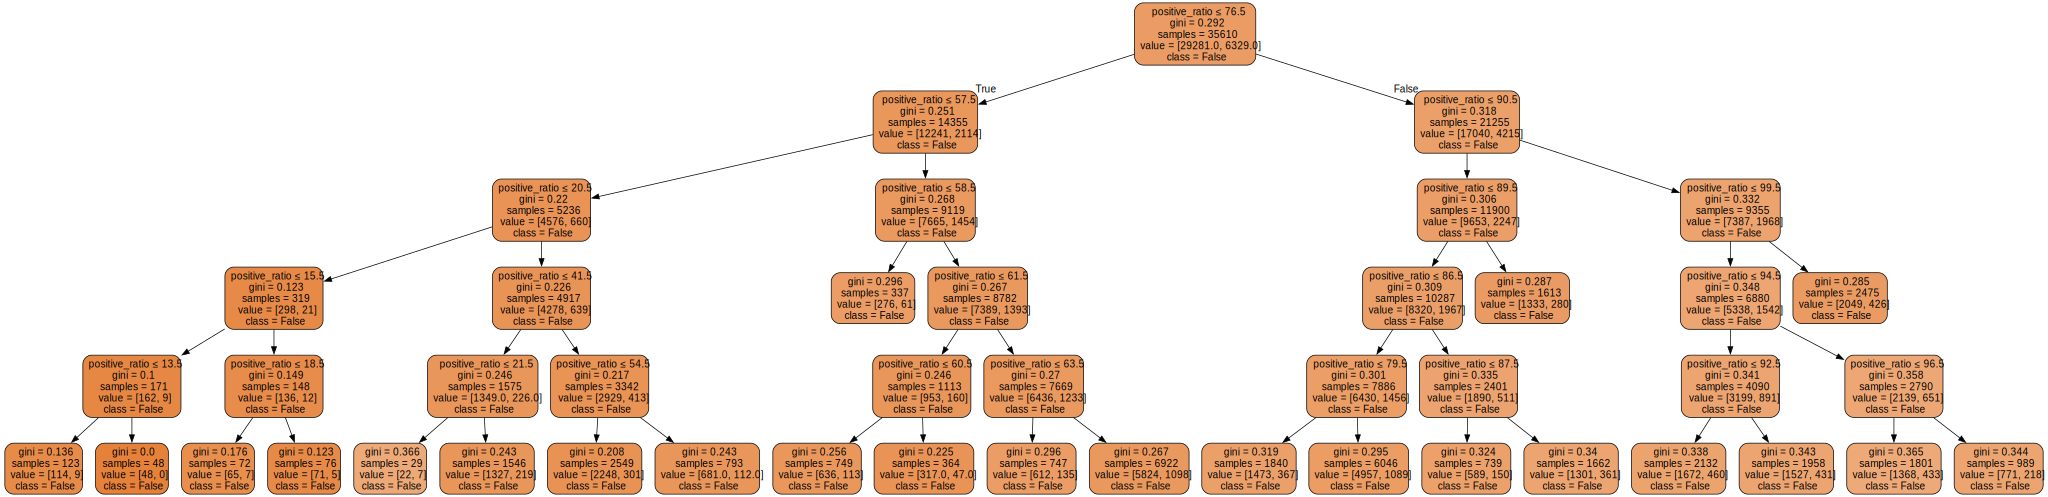

In [160]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

okay dus er wordt wel gefiltert, maar ja alles blijft gemixed. Dit is wat ik dacht, laten we maar een extra colom gaan toevoegen.

In [161]:
features= ['positive_ratio', 'price_original']
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=5, random_state=42)

we hebben nu 1 colom toegevoegd in de hoop dat dit helpt.
ik denk dat er nu op zn minst op 2 plekken een gini van 0 komt (want nu hebben we dat al bij 1tje)

In [162]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.823083403538332)

het nummer qua accuracy is het zelfde, dus laten we maar daar de graph gaan kijken

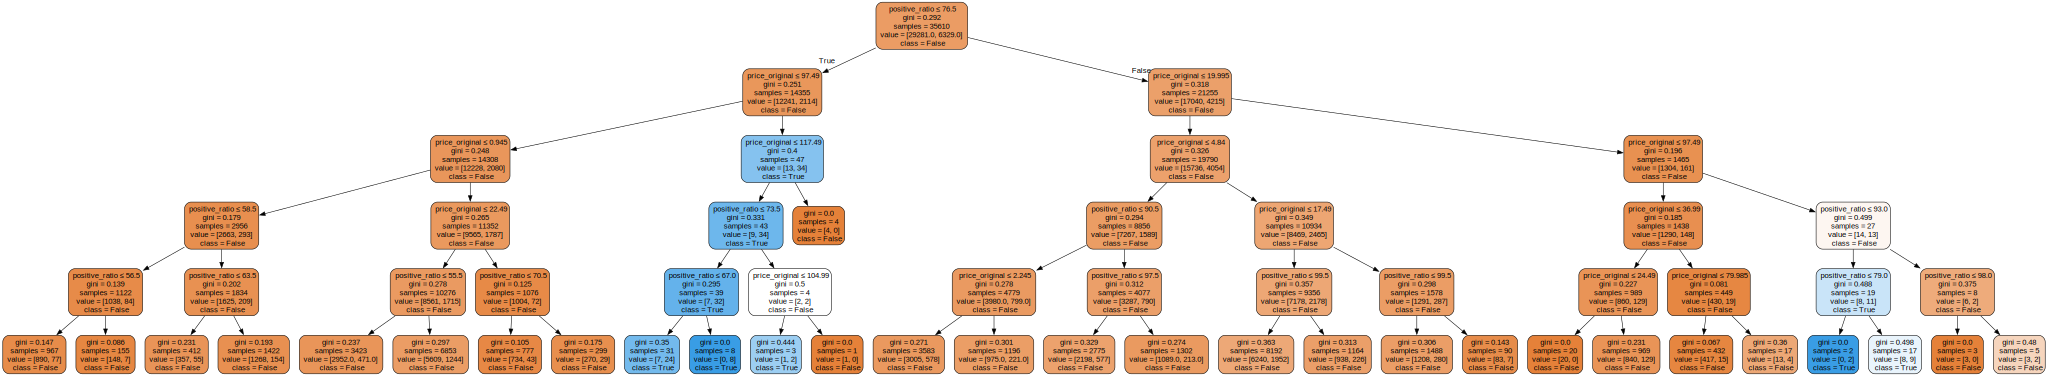

In [163]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

we hebben nu positieve veranderingen. 4 gini's van 0. en een nieuwe kleur :3

ik ga nu price_final toevoegen, kijken of dit iets verandert. Ik denk het persoonlijk niet. Maar ik hoop voor 5 gini's van 0

In [164]:
features= ['positive_ratio', 'price_original', 'price_final']
dt = DecisionTreeClassifier(max_depth = 5, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=5, random_state=42)

In [165]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.8231114855377702)

hij is nu 0.00003 accurater. Laten we maar gaan kijken naar de tree

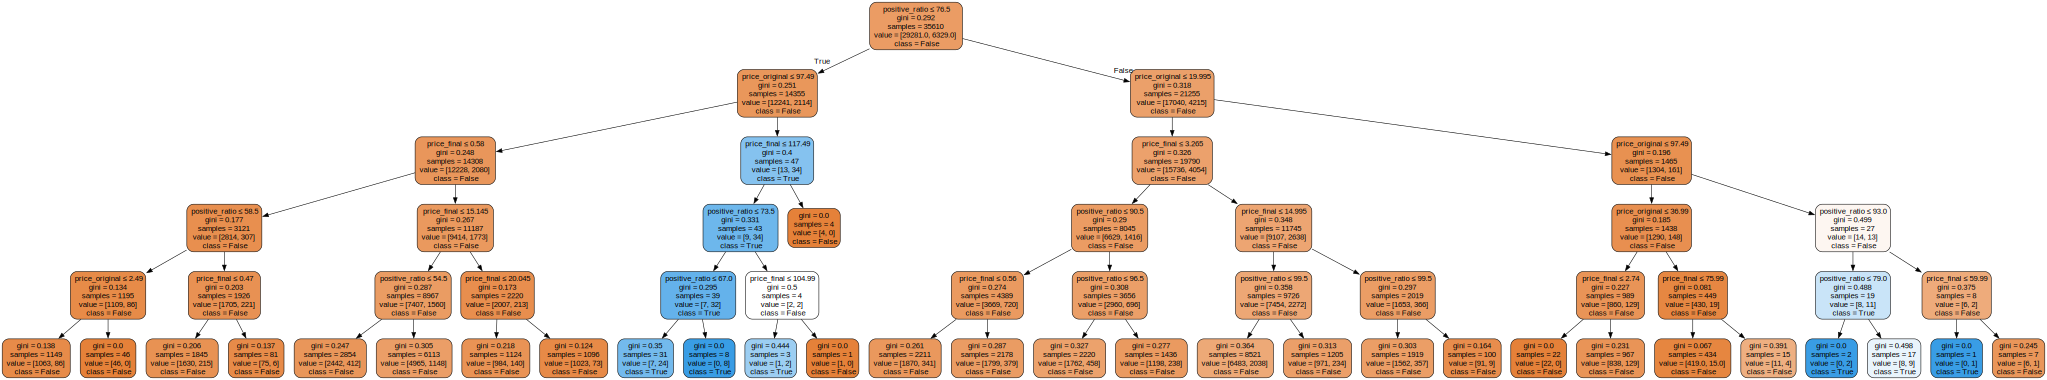

In [166]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

6 ginis van 0, dat is top. Nu ga ik de tree tot 7 maken, kijken of dat profeit geeft.

In [167]:
features= ['positive_ratio', 'price_original', 'price_final']
dt = DecisionTreeClassifier(max_depth = 7, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=7, random_state=42)

In [168]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.8236731255265375)

0.00056 vooruitgang is vooruitgang, maar ik denk dat het niet veel zoden aan de dijk zet, want ik geloof nogsteeds niet dat er een echt verband is.

zullen we maar gaan kijken of de gini 9+ is, waarschijnlijk wel?

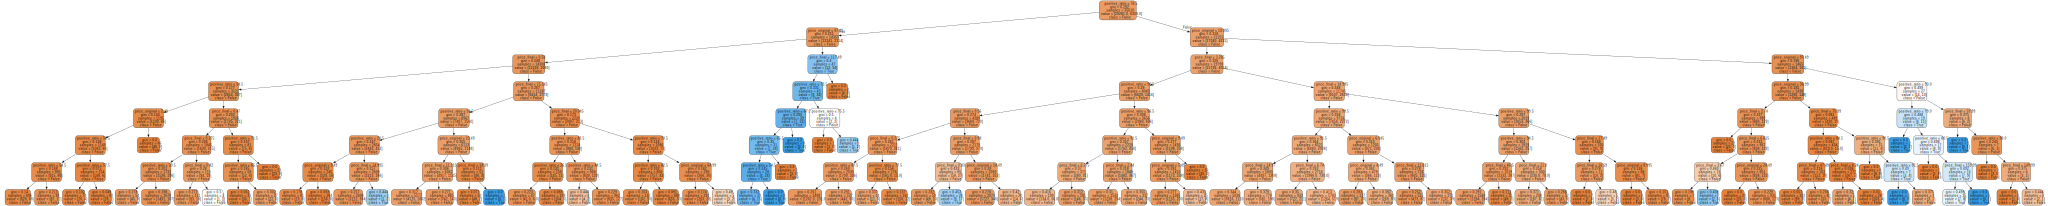

In [169]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

er zijn er 21 met een gini van 0, dat is wel opeens extreem veel.

ik ga nu mijn for loop runne om te kijken naar de beste depth

In [170]:
features= ['positive_ratio', 'price_original', 'price_final']
for x in range(1,55):
    dt = DecisionTreeClassifier(max_depth = x, random_state=42)
    dt.fit(games_train[features], games_train['linux'])
    predictions = dt.predict(games_train[features])
    predictions
    print(f"Bij {x} is de accuracy: {calculate_accuracy(predictions, games_train.linux)}")

Bij 1 is de accuracy: 0.8222690255546194
Bij 2 is de accuracy: 0.8228587475428251
Bij 3 is de accuracy: 0.8229710755405785
Bij 4 is de accuracy: 0.8230553215388936
Bij 5 is de accuracy: 0.8231114855377702
Bij 6 is de accuracy: 0.8232518955349621
Bij 7 is de accuracy: 0.8236731255265375
Bij 8 is de accuracy: 0.8243751755124965
Bij 9 is de accuracy: 0.8250210614995788
Bij 10 is de accuracy: 0.825975849480483
Bij 11 is de accuracy: 0.8266498174670036
Bij 12 is de accuracy: 0.8279415894411682
Bij 13 is de accuracy: 0.8291210334175794
Bij 14 is de accuracy: 0.8307778713844426
Bij 15 is de accuracy: 0.8319573153608537
Bij 16 is de accuracy: 0.833305251333895
Bij 17 is de accuracy: 0.834400449311991
Bij 18 is de accuracy: 0.8355237292895255
Bij 19 is de accuracy: 0.8361696152766077
Bij 20 is de accuracy: 0.8368716652625667
Bij 21 is de accuracy: 0.8372648132547037
Bij 22 is de accuracy: 0.8376579612468408
Bij 23 is de accuracy: 0.837910699241786
Bij 24 is de accuracy: 0.8379668632406627
Bij 2

hierbij zie ik dat bij een depth van 27 het hoogste is, en er niet meer verandert, maar het is een beetje een waste van recourses. ik ga verder met 9 omdat het voelt alsof het daarna minder toeneemd. Dit ga ik checken.

In [171]:
features= ['positive_ratio', 'price_original', 'price_final']
lastOne = 0
for x in range(1,55):
    dt = DecisionTreeClassifier(max_depth = x, random_state=42)
    dt.fit(games_train[features], games_train['linux'])
    predictions = dt.predict(games_train[features])
    predictions
    print(f"Bij {x} is het verschil: {(calculate_accuracy(predictions, games_train.linux) - lastOne) * 100} (verdubbeld met 100 voor duidelijkheid)")
    lastOne = calculate_accuracy(predictions, games_train.linux)

Bij 1 is het verschil: 82.22690255546195 (verdubbeld met 100 voor duidelijkheid)
Bij 2 is het verschil: 0.058972198820561594 (verdubbeld met 100 voor duidelijkheid)
Bij 3 is het verschil: 0.011232799775340307 (verdubbeld met 100 voor duidelijkheid)
Bij 4 is het verschil: 0.008424599831513557 (verdubbeld met 100 voor duidelijkheid)
Bij 5 is het verschil: 0.005616399887664603 (verdubbeld met 100 voor duidelijkheid)
Bij 6 is het verschil: 0.014040999719189262 (verdubbeld met 100 voor duidelijkheid)
Bij 7 is het verschil: 0.04212299915753448 (verdubbeld met 100 voor duidelijkheid)
Bij 8 is het verschil: 0.0702049985959019 (verdubbeld met 100 voor duidelijkheid)
Bij 9 is het verschil: 0.0645885987082262 (verdubbeld met 100 voor duidelijkheid)
Bij 10 is het verschil: 0.09547879809042037 (verdubbeld met 100 voor duidelijkheid)
Bij 11 is het verschil: 0.06739679865206405 (verdubbeld met 100 voor duidelijkheid)
Bij 12 is het verschil: 0.1291771974164635 (verdubbeld met 100 voor duidelijkheid)
B

bij 14 zien we nu het meeste verschil. maar ik kies voor 8 want dat is een kleiner getal met goede growth

In [172]:
features= ['positive_ratio', 'price_original', 'price_final']
dt = DecisionTreeClassifier(max_depth = 8, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [173]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.8243751755124965)

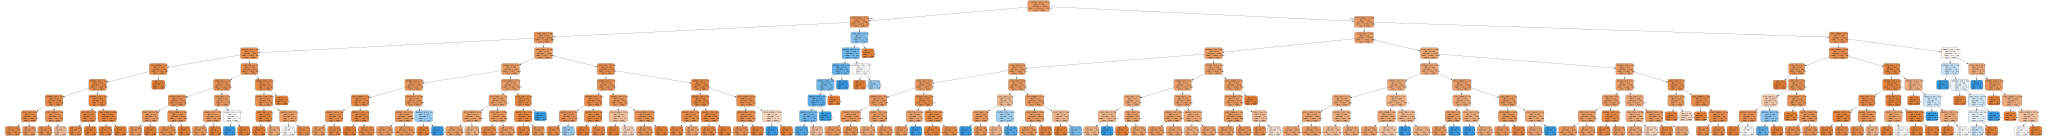

In [174]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

ik ga niet tellen hoeveel er nu zijn met gini 0

nu ga ik colomn user_reviews en discount toevoegen, ik gok dat de accuracy met 0.003 omhoog gaat

In [175]:
features= ['positive_ratio', 'price_original', 'price_final', 'user_reviews', 'discount']
dt = DecisionTreeClassifier(max_depth = 8, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [176]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.825582701488346)

het is verandert met 0,0012, dus dat is minder dan ik dacht.

nu ga ik de mac en windows en steamdeck toevoegen. ik gok dat dit 0.002 toevoegd aan de accuraatheid

In [177]:
features= ['positive_ratio', 'price_original', 'price_final', 'user_reviews', 'discount', 'mac', 'win', 'steam_deck']
dt = DecisionTreeClassifier(max_depth = 8, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [178]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.8743049705139005)

0.05 is nu het verschil dus ik zat weer fout. Laten we kijken naar de graph

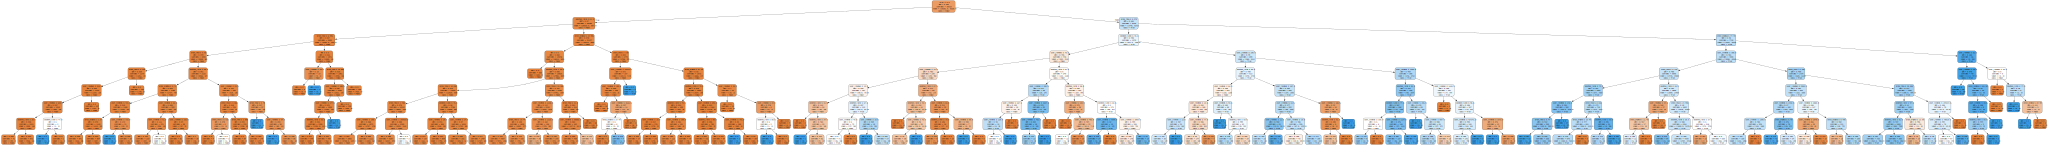

In [179]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

nu ga ik het proberen met de laatste colom, de categorische colom genaamd `rating`, ik gok dat dit met 0.001 zal veranderen

In [180]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
games_train['rating_encoded'] = le.fit_transform(games_train['rating'])

features= ['positive_ratio', 'price_original', 'price_final', 'user_reviews', 'discount', 'mac', 'win', 'steam_deck', 'rating_encoded']
dt = DecisionTreeClassifier(max_depth = 8, random_state=42)
dt.fit(games_train[features], games_train['linux'])

DecisionTreeClassifier(max_depth=8, random_state=42)

In [181]:
predictions = dt.predict(games_train[features])
predictions
calculate_accuracy(predictions, games_train.linux)

np.float64(0.8743049705139005)

ze zijn het zelfde? dat betekent dus dat de colom rating nutteloos is in dit geval.

## testdata

we gaan het nu testen op de stestdata dateset en ik verwacht dat de accuraatheid maar 0.5 zal zijn, want ik denk nogsteeds dat het random is.

In [188]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
games_test['rating_encoded'] = le.fit_transform(games_test['rating'])

features= ['positive_ratio', 'price_original', 'price_final', 'user_reviews', 'discount', 'mac', 'win', 'steam_deck', 'rating_encoded']
dt = DecisionTreeClassifier(max_depth = 8, random_state=42)
dt.fit(games_train[features], games_train['linux'])
predictions = dt.predict(games_test[features])
print(f"Bij 8 depth is de accuracy: {calculate_accuracy(predictions, games_test.linux)}")

Bij 8 depth is de accuracy: 0.8652208098545406


dit verbaast me, de accuracy is maar een klein beetje verslechterd, sud dit kan betekenen dat er dus wel een logica in zit.

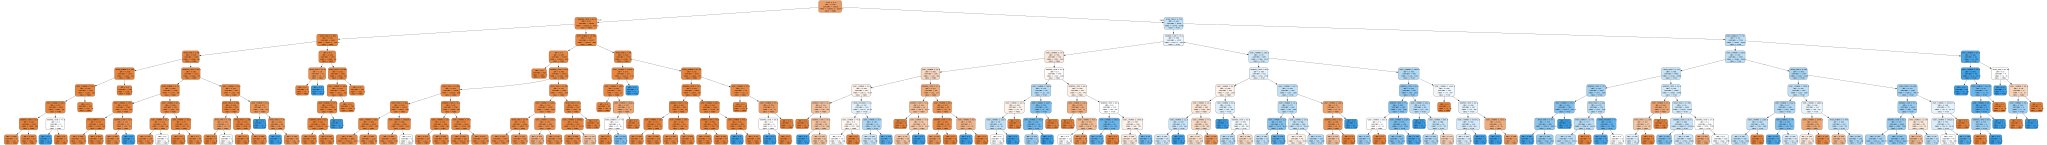

In [191]:
dt.fit(games_train[features], games_train['linux'])
plot_tree_classification(dt, features, np.sort(class_names_str))

wat heb ik geleerd?
- ik had een andere dataset moeten kiezen die beter zou werken met dit soort decision trees
- er zit blijkbaar dus ergens wel een verband tussen linux spellen en niet linux spellen, maar niet heel duidelijk.